simulation of multivariate data and plotting confidence regions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.stats import norm, chi2

In [2]:
def generate_correlated_data(num_samples,mu,cov_mat):
  init_x = norm.rvs(size=(len(cov_mat),num_samples),random_state=101)
  c = la.cholesky(cov_mat,lower=True)
  X=np.dot(c,init_x)
  X=X+np.outer(np.ones(num_samples),mu).transpose()
  return X

In [3]:
cov_mat = np.array([[1.1,-1],[-1,1]])
mu=np.array([0,0])
X=np.random.multivariate_normal(mean=mu,cov=cov_mat,size=100).transpose()
np.corrcoef(X[0],X[1])
#X has two features so X[0],X[1]
#o/p correlation matrix

array([[ 1.        , -0.94426128],
       [-0.94426128,  1.        ]])

In [ ]:
#plotting simulated data for different


In [4]:
rhos=np.array([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
rhos_mesh= rhos.reshape(3,3)
rhos_mesh

array([[-1.  , -0.75, -0.5 ],
       [-0.25,  0.  ,  0.25],
       [ 0.5 ,  0.75,  1.  ]])

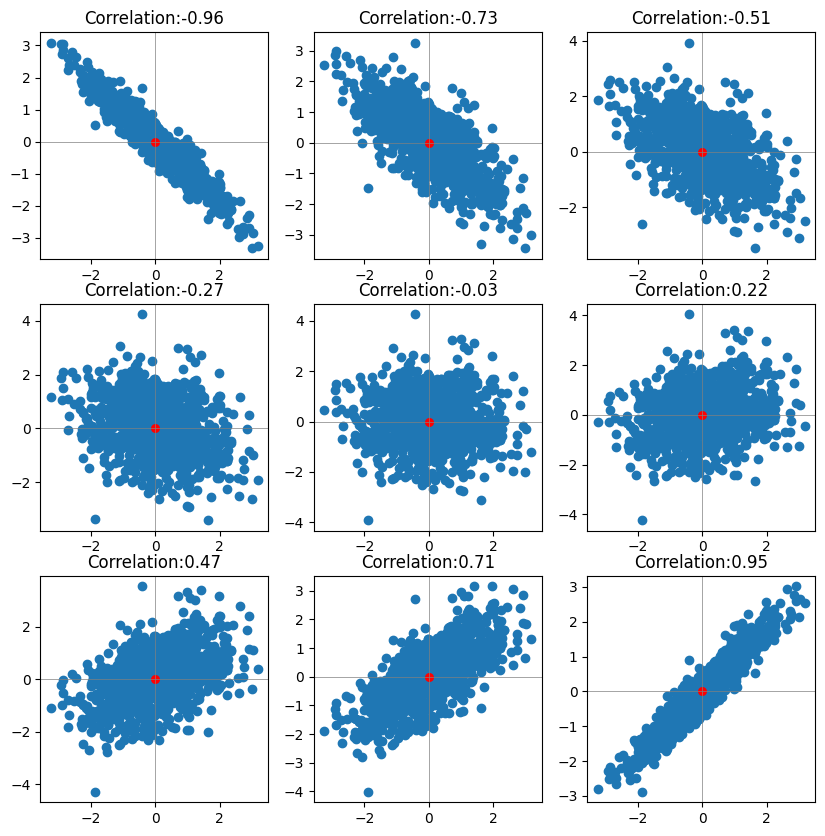

In [12]:
num_samples=1000
mu=[0,0]
nrows,Ncols=rhos_mesh.shape
fig,axs=plt.subplots(nrows=nrows,ncols=Ncols,figsize=(10,10))
#layout for the plot of order 10*10
#plotting subplots in 9 blocks
for rhos_row,ax_row in zip(rhos_mesh,axs):
  for rho,ax in zip(rhos_row,ax_row):
    cov_mat=[[1.1,rho],[rho,1]]
    X=generate_correlated_data(num_samples,mu,cov_mat)
    #different plot for different correlation values
    ax.scatter(X[0],X[1])
    ax.scatter(mu[0],mu[1],s=30,c="red")
    ax.axhline(c='grey',lw=.5)
    ax.axvline(c='grey',lw=.5)
    corr_computed=np.corrcoef(X[0],X[1])[0,1].round(2)
    ax.set_title(f"Correlation:{corr_computed}")
plt.show()

Text(0.5, 1.0, 'Correlation:-0.956350350272335')

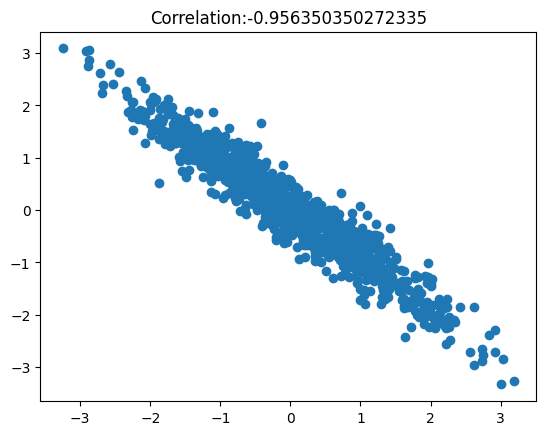

In [20]:
init_x = norm.rvs(size=(2,1000))
cov_mat=np.array([[1.1,-1],[-1,1]])
mu=np.array([0,0])

X=generate_correlated_data(num_samples=1000,mu=mu,cov_mat=cov_mat)
corr_=np.corrcoef(X[0],X[1])[0,1]
plt.scatter(X[0],X[1])
plt.title(f"Correlation:{corr_}")


write a code to generate univariate normal data (or normally distributed dataset) and draw qq plot. mean and variance can be of your own choice.

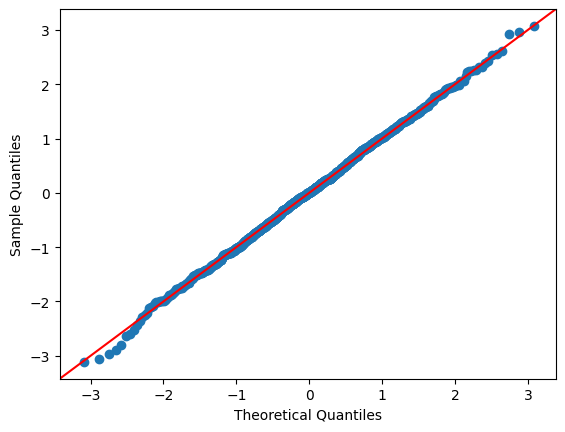

In [17]:
import numpy as np
import statsmodels.api as sm
import pylab as py

# Generating univariate normal data
mean = 0
variance = 1
data = np.random.normal(mean, np.sqrt(variance), 1000)

# Drawing the QQ plot
sm.qqplot(data, line ='45')
py.show()


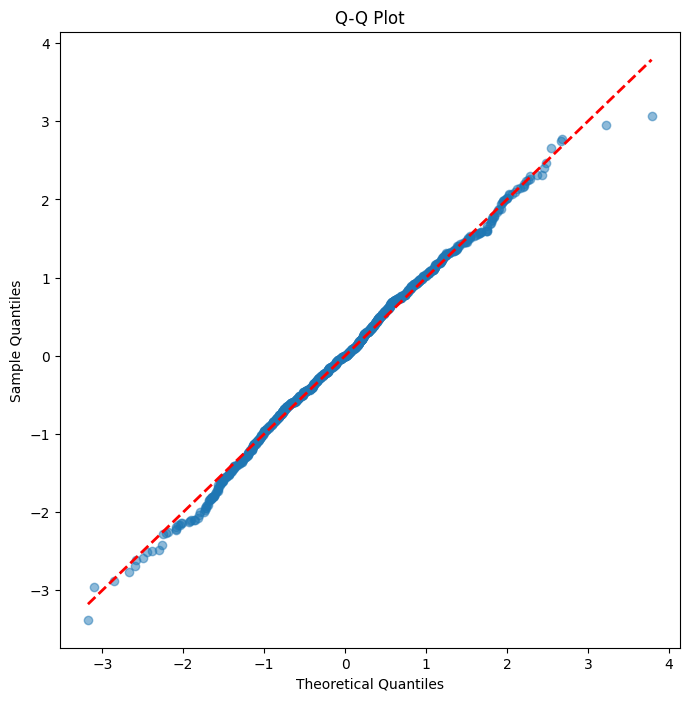

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def box_muller(num_samples):
    #Generate univariate normal data using Box-Muller transform
    u1 = np.random.uniform(0, 1, num_samples)
    u2 = np.random.uniform(0, 1, num_samples)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    return z1

def qq_plot(sample_data, theoretical_data, ax):
    #Create a Q-Q plot comparing sample data to theoretical data
    sample_quantiles = np.percentile(sample_data, np.linspace(0, 100, len(sample_data)))
    theoretical_quantiles = np.percentile(theoretical_data, np.linspace(0, 100, len(theoretical_data)))

    ax.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5)
    ax.plot([min(theoretical_quantiles), max(theoretical_quantiles)],
            [min(theoretical_quantiles), max(theoretical_quantiles)],
            'r--', lw=2)
    ax.set_xlabel('Theoretical Quantiles')
    ax.set_ylabel('Sample Quantiles')
    ax.set_title('Q-Q Plot')

# Parameters
mean = 0
variance = 1
num_samples = 1000

# Generate univariate normal data
sample_data = box_muller(num_samples) * np.sqrt(variance) + mean

# Generate theoretical normal distribution data for comparison
theoretical_data = np.random.normal(loc=mean, scale=np.sqrt(variance), size=num_samples)

# Create Q-Q plot
fig, ax = plt.subplots(figsize=(8, 8))
qq_plot(sample_data, theoretical_data, ax)
plt.show()


In [22]:
#Confidence Regions
from matplotlib.patches import Ellipse

In [25]:
num_samples=1000
mu=[1,2]
cov_mat=[[1.1,0.75],[0.75,1]]
X=generate_correlated_data(num_samples,mu,cov_mat)
data=pd.DataFrame(X.transpose())
data

,0,1
0,3.838968,4.391164
1,1.658791,2.396902
2,1.952286,2.380469
3,1.528417,2.666170
4,1.682898,2.109769
...,...,...
995,0.174687,1.991683
996,0.576288,4.689387
997,1.208170,2.172647
998,1.677577,3.362081


In [26]:
def draw_confidence_ellipse(data,alpha,**kwargs):
  dof=len(data.columns)
  if n-p>40:
    c=np.sqrt(chi2.ppf(1-alpha,dof))
  else:
    print("n-p < 40 , Hence cannot draw confidence ellipse matrix")
  mean_vec=np.array(data.mean())
  cov_matrix=np.array(data.cov())
  #find eigen values and eigen vectors
  eigvals,eigvec=np.linalg.eigh(cov_matrix)

In [ ]:
#Assignment 1: use norm.ppf asc ord obs val find p and q , then plot x,q --> moodle digital assignment